# COGS 108 - EDA Checkpoint

<!-- # Names -->
- Aasem Fituri
- Casey Hild
- Carlos van der Ley
- Jeremy Quinto

<a id='research_question'></a>
# Research Question

<!-- *Fill in your research question here* -->
Can we find a correlation between cancer rates and socioeconomic status?  More specifically, how does income, education, and employment status affect cancer rates across the United States?

# Setup

In [42]:
# Imports
# CoPilot was used for some assistance in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.formula.api as smf

import geopandas as gpd

data_cancer = pd.read_csv('data/cancer_reg.csv')
data_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


# Data Cleaning

Describe your data cleaning steps here.

In [43]:
# check shape, dtype, and visible null values by the outcome of the info() method
data_cancer.rename(columns=lambda x: str.lower(x), inplace=True)    # Lowercase column names
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [ ]:
# check NA across the dataset
# True result matches with info() result above
data_cancer.isna().values.any()

In [45]:
# check which columns have NA
data_cancer.loc[:, data_cancer.isna().any()].count()

In [46]:
# We first begin by removing the columns that are not necessary for our analysis
data_cancer = data_cancer.drop(['studypercap', 'percentmarried', 'pctnohs18_24', 'pcths18_24', 
                  'pctsomecol18_24', 'pctbachdeg18_24', 'pctprivatecoveragealone', 'pctpubliccoveragealone', 'pctwhite',
                  'pctasian', 'pctblack', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'], axis=1)

In [47]:
data_cancer.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,medianage,medianagemale,medianagefemale,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,2895.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,45.272333,39.570725,42.145323,34.804660,13.282015,54.152642,7.852412,64.354939,41.196324,36.252642
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,45.304480,5.226017,5.292849,7.034924,5.394756,8.315064,3.452371,10.647057,9.447687,7.841741
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,22.300000,22.400000,22.300000,7.500000,2.500000,17.600000,0.400000,22.300000,13.500000,11.200000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,37.700000,36.350000,39.100000,30.400000,9.400000,48.600000,5.500000,57.200000,34.500000,30.900000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,41.000000,39.600000,42.400000,35.300000,12.300000,54.500000,7.600000,65.100000,41.100000,36.300000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,44.000000,42.500000,45.300000,39.650000,16.100000,60.300000,9.700000,72.100000,47.700000,41.550000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,624.000000,64.700000,65.700000,54.800000,42.200000,80.100000,29.400000,92.300000,70.700000,65.100000


After looking at some of the descriptive statistics, we found that the max value for the variable medianage shows an unreasonable value.

In [48]:
# checking number of rows with medianage > 100
# medianage >= max (medianagemale, medianagefemale) 
data_cancer.loc[data_cancer.medianage > 100].shape[0]

30

In [49]:
data_cancer.loc[data_cancer.medianage > 100, ['medianage', 'medianagemale', 'medianagefemale']]

,medianage,medianagemale,medianagefemale
100,458.4,36.3,40.7
181,469.2,37.6,40.1
225,546.0,44.2,46.7
318,624.0,51.6,52.5
425,508.8,41.5,43.4
606,619.2,52.3,50.7
637,498.0,40.4,42.4
843,412.8,33.0,35.6
991,481.2,39.4,41.4
1199,424.8,34.2,36.8


There are 30 entries in the variable medianage with unreasonable values. Since these ages do not really make sense, and the number of entries with this erroneous data is small, we can simply drop those entries.

In [50]:
data_cancer = data_cancer.drop(data_cancer[data_cancer.medianage > 65.70].index)
data_cancer.shape

(3017, 19)

We will now split the geography column into two separate columns: County and State so that we can more easily group together entries within a certain region.

In [51]:
# Adding County, State columns from info in the 'geography' column
data_cancer[['county', 'state']] = data_cancer['geography'].str.split(',', n=1, expand=True)
data_cancer['state'] = data_cancer['state'].str.strip()

In [52]:
data_cancer['state'].nunique()

51

We first begin by splitting the geography column in separate county and state columns. This lets us easily group data points together into different regions as shown below. We have chosen to group the different states into the regions specified here: https://education.nationalgeographic.org/resource/united-states-regions/

In [53]:
# Assigning a Region to each County based on its state
West = ['California', 'Nevada', 'Hawaii', 'Alaska', 'Washington', 'Oregon', 'Idaho', 'Montana', 'Wyoming', 'Utah', 'Colorado']
SouthWest = ['Arizona', 'New Mexico', 'Texas', 'Oklahoma']
MidWest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 'Illinois', 'Indiana', 'Michigan', 'Ohio']
SouthEast = ['Kentucky', 'Arkansas', 'Louisiana', 'Mississippi', 'Tennessee', 'North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Florida', 'Virginia', 'West Virginia', 'District of Columbia', 'Delaware']
NorthEast = ['Maryland', 'Pennsylvania', 'New Jersey', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine']
# Length of all lists combines to 51 (Washington D.C is included)
assert(len(West) + len(SouthWest) + len(MidWest) + len(SouthEast) + len(NorthEast) == 51)

# Create the 'Region' column
data_cancer['region'] = data_cancer['state'].apply(lambda x: 'West' if x in West else
                                                         'South West' if x in SouthWest else
                                                         'Mid West' if x in MidWest else
                                                         'South East' if x in SouthEast else
                                                         'North East' if x in NorthEast else '')

In [54]:
data_cancer.groupby('region').popest2015.sum()

region
Mid West      66392506
North East    61916962
South East    80832274
South West    33998087
West          66763225
Name: popest2015, dtype: int64

In [55]:
data_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,county,state,region
0,1397.0,469,164.9,489.8,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.9,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.0,70,161.3,411.6,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.9,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.0,50,174.7,349.7,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.9,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.0,202,194.8,430.4,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.3,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.0,26,144.4,350.1,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.2,4.8,61.6,35.1,44.0,Lincoln County,Washington,West


As we can see, some regions have many more data points than other regions. Here are the populations of the various regions:

In [56]:
data_cancer.groupby('region').popest2015.sum()

region
Mid West      66392506
North East    61916962
South East    80832274
South West    33998087
West          66763225
Name: popest2015, dtype: int64

In [57]:
data_cancer.groupby('region').count()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,geography,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,county,state
region,,,,,,,,,,,,,,,,,,,,,
Mid West,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,...,1021,1021,1021,968,1021,1021,1021,1021,1021,1021
North East,237,237,237,237,237,237,237,237,237,237,...,237,237,237,224,237,237,237,237,237,237
South East,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,...,1036,1036,1036,990,1036,1036,1036,1036,1036,1036
South West,355,355,355,355,355,355,355,355,355,355,...,355,355,355,338,355,355,355,355,355,355
West,368,368,368,368,368,368,368,368,368,368,...,368,368,368,348,368,368,368,368,368,368


We can also see that some regions have a higher population than other regions. We believe that this difference is appropriate for the purposes of this project as we do not plan to perform any rigorous analysis based on the different regions. We simply think that some useful insight could be provided in our exploratory data analysis by looking at how cancer rates and cancer deaths differ among different regions.

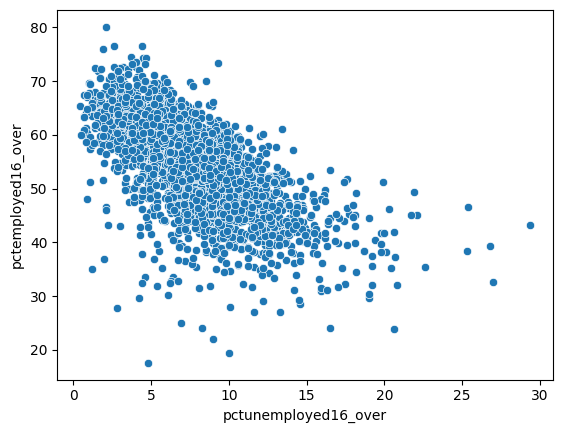

In [58]:
sns.scatterplot(x='pctunemployed16_over', y='pctemployed16_over', data=data_cancer.dropna());

In this scatter plot, we can see the relationship between the percent of employed people over the age of 16 versus the percent of employed people over the age of 16. This scatterplot shows a clear negative correlation between these two variables. As the percent of unemployed people increases, the percent of employed people tends to decreases. This makes sense and is what we would expect as these two variables are dependent on each other in this manner since a person in this age group must be either employed or unemployed. We also notice this is not a perfect linear relationship as we do have people who did not supply data for this section or are neither employed nor unemployed, so the percent employed + the percent unemployed does not necessarily add up to 100% for each county.

In [59]:
model = smf.ols(formula='pctemployed16_over ~ pctunemployed16_over', data=data_cancer.dropna())
output = model.fit()
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:     pctemployed16_over   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     2069.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:28:33   Log-Likelihood:                -9367.3
No. Observations:                2868   AIC:                         1.874e+04
Df Residuals:                    2866   BIC:                         1.875e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               66.4087 

In [60]:
data_cancer['pctemployed16_over'] = data_cancer['pctemployed16_over'].fillna(data_cancer['pctunemployed16_over']*(-1.5619) + 66.4087)

Based on the linear regression above, it seems that there is a linear relationship between employment rate and unemployment rate as one would expect. Thus, it seems appropriate to fill in missing employment rates by using this linear regression model and using the existing unemployment rate (since there are no missing values for unemployment rates) as the input. It is important to note that employment rate and unemployment rate do not necessarily add up to 1 because a person can be neither employed nor unemployed (e.g. students).

In [61]:
data_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3017 entries, 0 to 3046
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   avganncount           3017 non-null   float64
 1   avgdeathsperyear      3017 non-null   int64  
 2   target_deathrate      3017 non-null   float64
 3   incidencerate         3017 non-null   float64
 4   medincome             3017 non-null   int64  
 5   popest2015            3017 non-null   int64  
 6   povertypercent        3017 non-null   float64
 7   binnedinc             3017 non-null   object 
 8   medianage             3017 non-null   float64
 9   medianagemale         3017 non-null   float64
 10  medianagefemale       3017 non-null   float64
 11  geography             3017 non-null   object 
 12  pcths25_over          3017 non-null   float64
 13  pctbachdeg25_over     3017 non-null   float64
 14  pctemployed16_over    3017 non-null   float64
 15  pctunemployed16_over  3017

In [62]:
data_cancer

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,county,state,region
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.90000,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.90000,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.90000,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.30000,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.20000,4.8,61.6,35.1,44.0,Lincoln County,Washington,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,...,32.2,15.2,51.70000,4.3,78.3,44.6,31.7,Ellsworth County,Kansas,Mid West
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,...,23.1,12.4,70.10000,4.6,64.5,48.6,28.8,Finney County,Kansas,Mid West
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,...,23.0,12.8,64.80000,6.4,62.0,47.8,26.6,Ford County,Kansas,Mid West
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,...,36.1,14.4,55.63159,6.9,75.9,49.6,29.5,Franklin County,Kansas,Mid West


In [63]:
data_cancer.columns = ['avganncount', 'avgdeathsperyear', 'death rate', 'incidence rate',
       'median income', 'popest2015', 'poverty percent', 'binnedinc', 'medianage',
       'medianagemale', 'medianagefemale', 'geography', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'percent private coverage', 'percentt emp private coverage', 'percent public coverage',
       'county', 'state', 'region']

In [64]:
data_cancer['pctemployed16_over'].isna().any()

False

In [65]:
data_cancer

,avganncount,avgdeathsperyear,death rate,incidence rate,median income,popest2015,poverty percent,binnedinc,medianage,medianagemale,...,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,percent private coverage,percentt emp private coverage,percent public coverage,county,state,region
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,"(61494.5, 125635]",39.3,36.9,...,23.2,19.6,51.90000,8.0,75.1,41.6,32.9,Kitsap County,Washington,West
1,173.000000,70,161.3,411.600000,48127,43269,18.6,"(48021.6, 51046.4]",33.0,32.2,...,26.0,22.7,55.90000,7.8,70.2,43.6,31.1,Kittitas County,Washington,West
2,102.000000,50,174.7,349.700000,49348,21026,14.6,"(48021.6, 51046.4]",45.0,44.0,...,29.0,16.0,45.90000,7.0,63.7,34.9,42.1,Klickitat County,Washington,West
3,427.000000,202,194.8,430.400000,44243,75882,17.1,"(42724.4, 45201]",42.8,42.2,...,31.6,9.3,48.30000,12.1,58.4,35.0,45.3,Lewis County,Washington,West
4,57.000000,26,144.4,350.100000,49955,10321,12.5,"(48021.6, 51046.4]",48.3,47.8,...,33.4,15.0,48.20000,4.8,61.6,35.1,44.0,Lincoln County,Washington,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,"(45201, 48021.6]",44.2,41.1,...,32.2,15.2,51.70000,4.3,78.3,44.6,31.7,Ellsworth County,Kansas,Mid West
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,"(48021.6, 51046.4]",30.4,29.3,...,23.1,12.4,70.10000,4.6,64.5,48.6,28.8,Finney County,Kansas,Mid West
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,"(51046.4, 54545.6]",30.9,30.5,...,23.0,12.8,64.80000,6.4,62.0,47.8,26.6,Ford County,Kansas,Mid West
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,"(48021.6, 51046.4]",39.0,36.9,...,36.1,14.4,55.63159,6.9,75.9,49.6,29.5,Franklin County,Kansas,Mid West


We now have our cleaned dataset.

# Data Analysis & Results (EDA)

We will now carry out our Data Analysis and EDA. 

<!-- # tell something about the plot below -->
The map below shows the number of deaths for each state in the United States. The darker the color, the higher the number of deaths per 100,000 people. We can see that the highest number of deaths are in California. This is consistent with the CDC's data on cancer deaths by state: https://www.cdc.gov/cancer/dcpc/data/state.htm

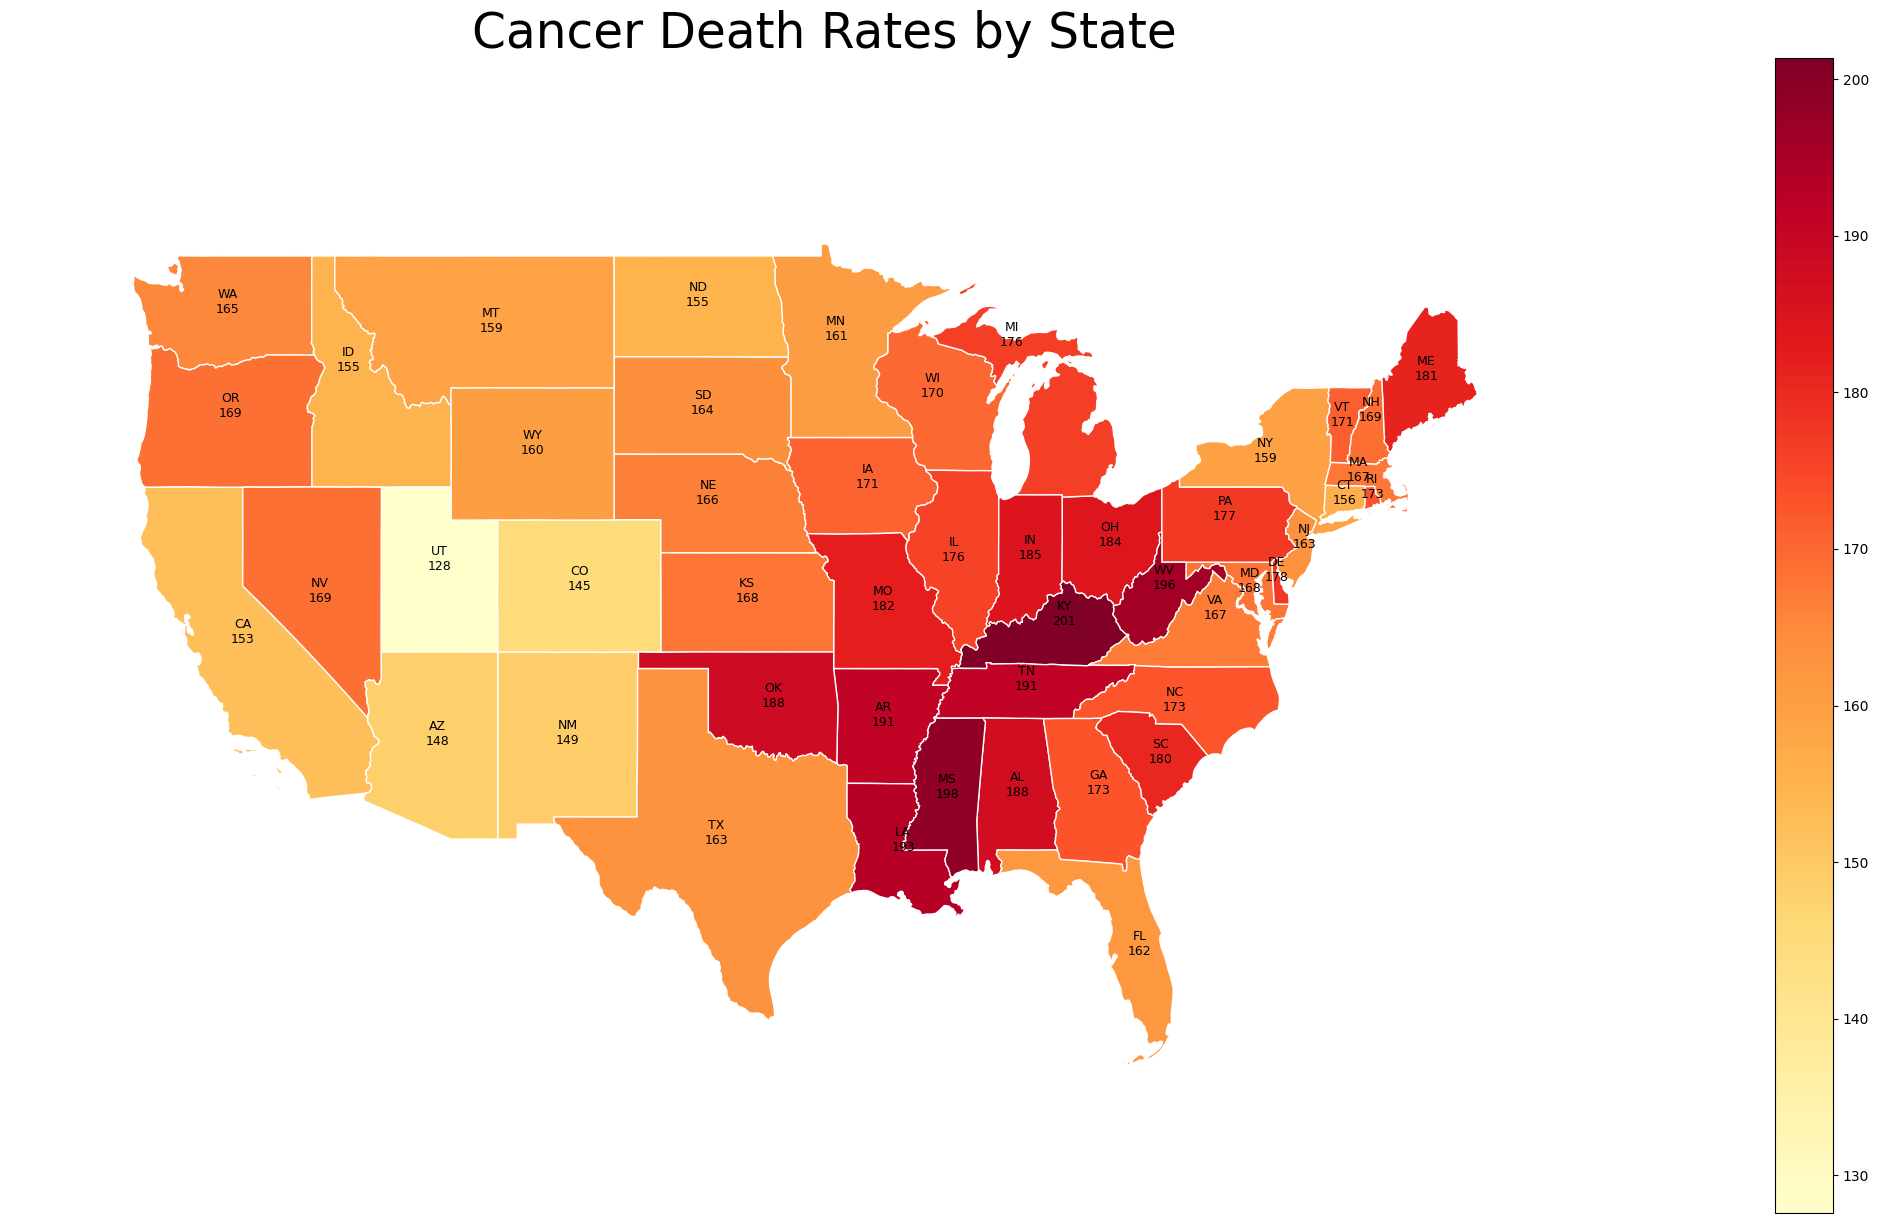

In [82]:
data_cancer['num_death'] = data_cancer['popest2015'] * data_cancer['death rate']
dc_agg = data_cancer.groupby('state').agg({'num_death': 'sum', 'popest2015': 'sum'}).round(2).reset_index()
dc_agg['num_death'] = dc_agg['num_death'] / dc_agg['popest2015']

# Load the US map shapefile using geopandas
us_map = gpd.read_file('shapefile/cb_2018_us_state_20m.shp')

us_geo = us_map.merge(dc_agg, left_on='NAME', right_on='state')
us_geo['coords'] = us_geo['geometry'].apply(lambda x: x.representative_point().coords[:])

fig, ax = plt.subplots(figsize=(35, 15))
us_geo.plot(column='num_death', 
            figsize=(35, 15), 
            legend=True, 
            # legend_kwds={'label': "Incidence Cancer Rate in 2015", 'orientation': "vertical"},
            edgecolor="white", cmap='YlOrRd', ax=ax)

for idx, row in us_geo.iterrows():

    if row['STUSPS'] == 'DC':
        continue

    if row['num_death'] >= 50000:
        plt.annotate("{}\n".format(row['STUSPS']), row['coords'][0],horizontalalignment='center', size=10, color='white')
        plt.annotate("{:.0f}".format(row['num_death']), row['coords'][0],horizontalalignment='center', size=10, color='white')
    
    else:
        plt.annotate("{}\n{:.0f}".format(row['STUSPS'], row['num_death']), row['coords'][0],horizontalalignment='center', size=9)

ax.set_title('Cancer Death Rates by State',fontsize=35)
plt.xlim(-130,-60)
plt.ylim(20,55)
plt.axis('off');

The above map shows death rates (per 100,000 people) in each state. This data was obtained by considering the death rates of the counties and their respective populations, aggregating such values by state and normalizing by the population of the state. It is important to note that the data was collected from 2010-2016 while 2015 estimated population data is used.

Below is a pairplot that shows the relationship between cancer incidence rate and cancer death rate. Here we can roughly see the relationships between the our variables. The pairplot also shows the distinction between the 5 different regions.

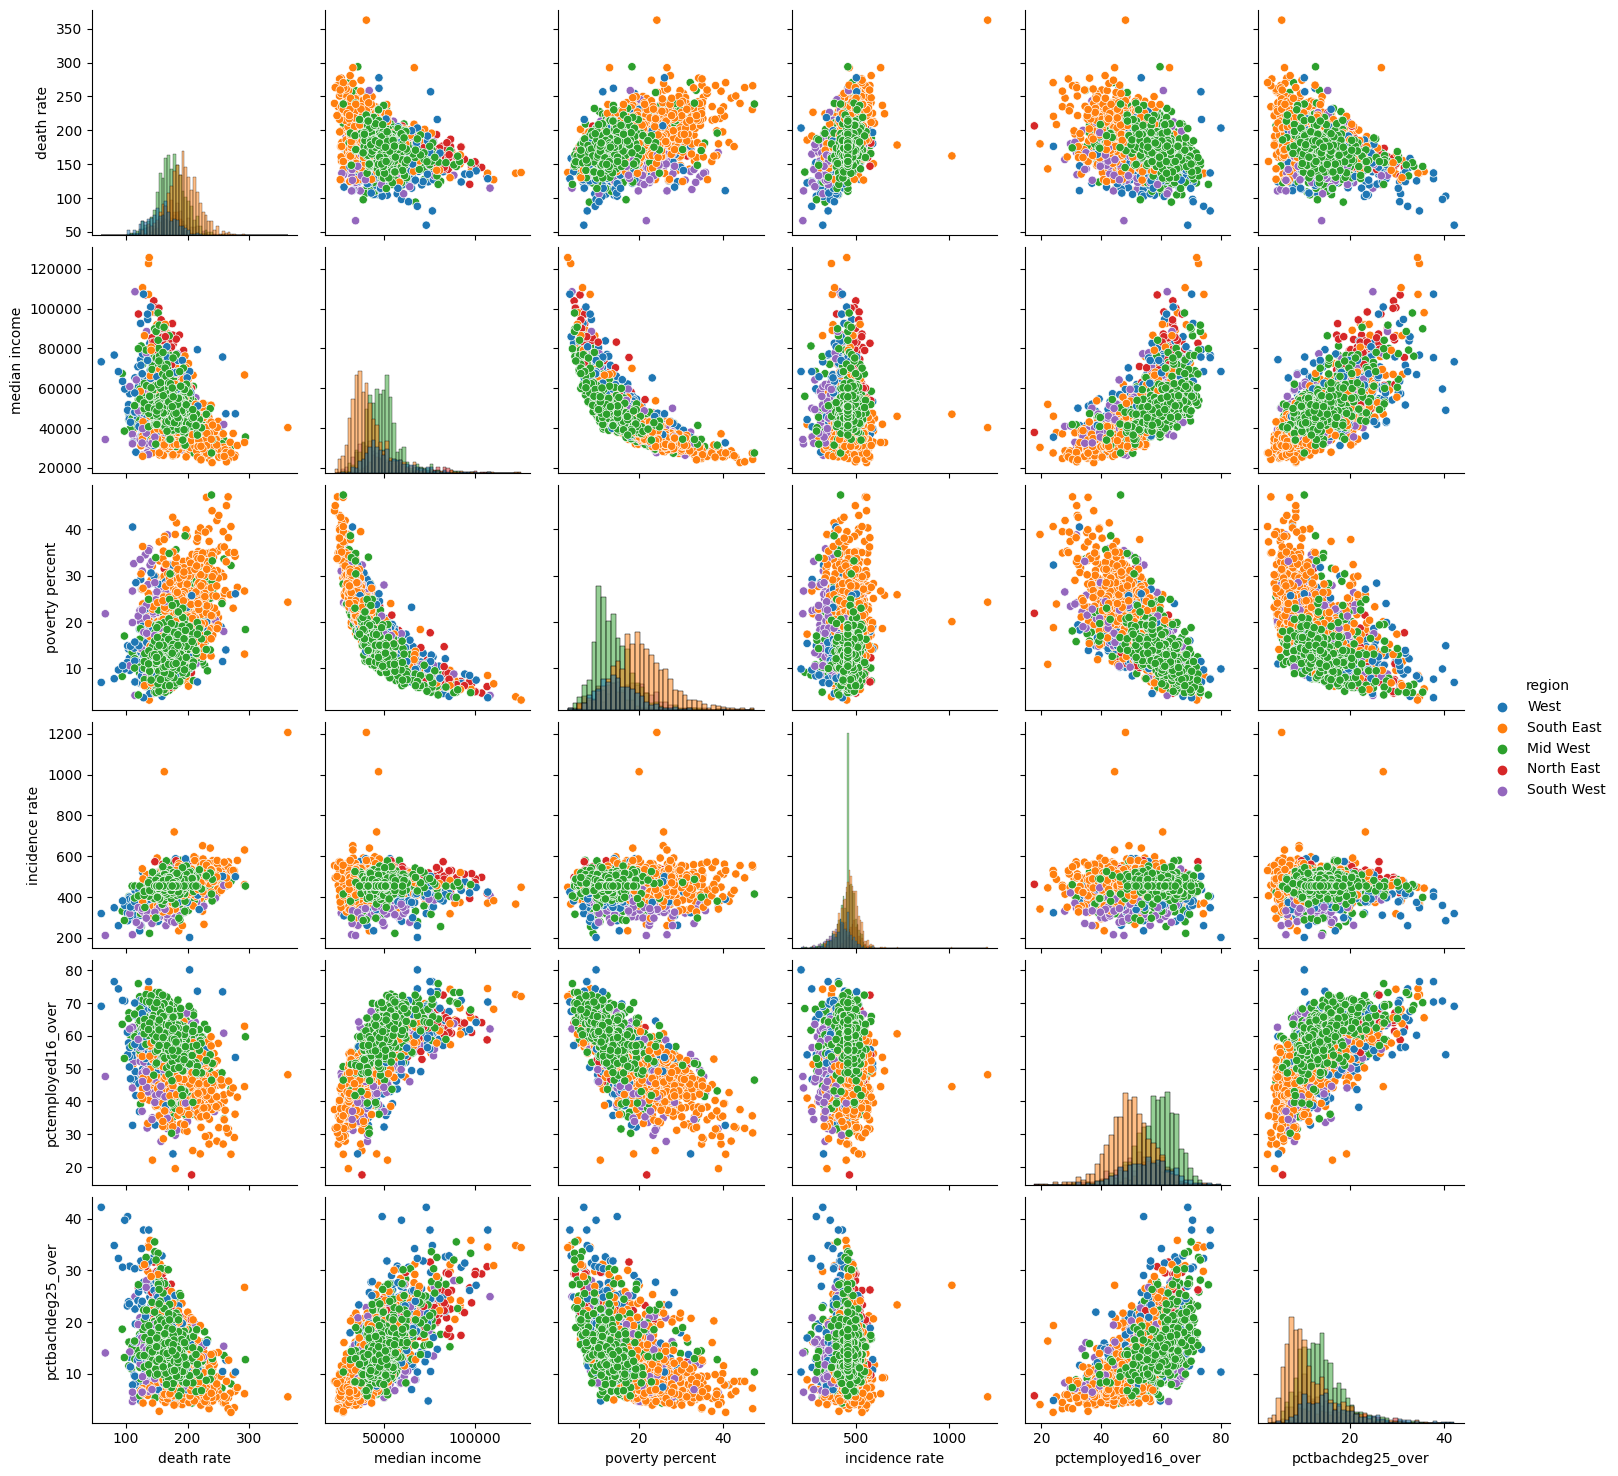

In [67]:
df = data_cancer[['region', 'death rate', 'median income', 'poverty percent', 'incidence rate', 'pctemployed16_over', 'pctbachdeg25_over']]
sns.pairplot(df, hue='region', diag_kind='hist');

Looking at the plots with cancer incidence rate on the y-axis, each plot seems to be flat, suggesting that there is not a strong relationship between cancer incidence rate and any of our variables: median income, poverty percent, employment, and education. 

Looking at the plots with cancer death rate on the y-axis is a little more interesting. We can see a negative trend for employment and education, suggesting that there may be a negative relationship between employment and cancer death rates, as well as education and cancer death rates. The same holds true for median income and cancer death rates, though the relationship does not seem nearly as strong. Looking at poverty percent vs cancer death rate, there is a visible positive relationship between the two, suggesting that higher poverty rates may be correlated with higher cancer death rates. 

When we calculate the correlation coefficients, we will expect these variables to have a negative coefficient with cancer death rates (except for poverty percent which would have a positive relationship). These results make sense with our hypothesis, as they hint that a lower socioeconomic status is correlated with a higher cancer death rate.

Next, we'll look at a boxplot of the cancer death rates for each region. 

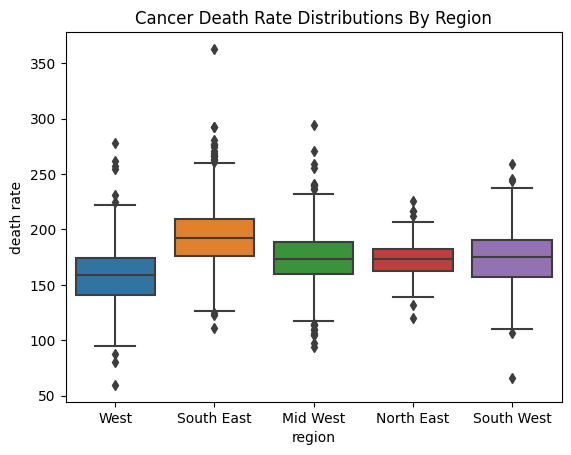

In [68]:
sns.boxplot(x='region', y='death rate', data=df)
plt.title("Cancer Death Rate Distributions By Region");

In this box plot, we can see the distributions of cancer death rates in each of our five regions. Most of these major regions have relatively similar median death rates. However, we can see a difference between some of these regions. The South East region has the highest cancer death rate at just under 200, while the West region has the lowest cancer death rate at around 160. We can also see that in a few of these regions, there are some outliers. For example, in the South East region, there is a county that has a death rate of over 350, which is much higher than all of the other counties in this region. 

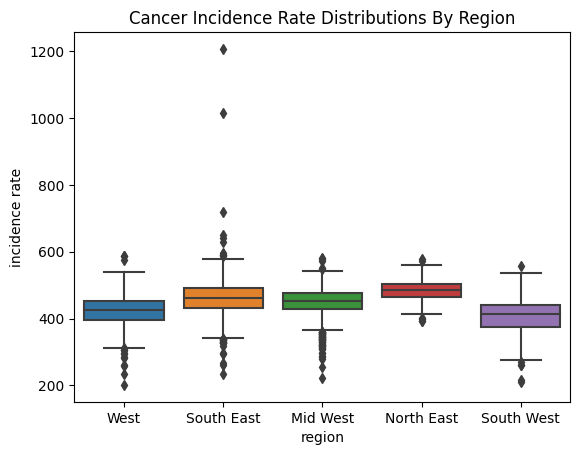

In [69]:
sns.boxplot(x='region', y='incidence rate', data=df)
plt.title("Cancer Incidence Rate Distributions By Region");

In this box plot, we can see how the cancer incidence rates are distributed for each of these regions. The first thing that stands out about these boxplots is the two very large outliers in the South East region. Comparing this to the box plots of the other regions, we see that these outliers are much farther away from the center of their distibution than any of the outliers in other regions. We also notice that there is a major difference in the spread of these distributions, ranging from a very small spread in the North East region to a very large spread in the South East region. It is important to note that this difference in distribution could be a result of a difference in the number of data points for each region. In particular, there are much more data points in the South East and Midwest region and not as many data points in the North East region (most likely due to what seems to be a lower number of counties in those regions).

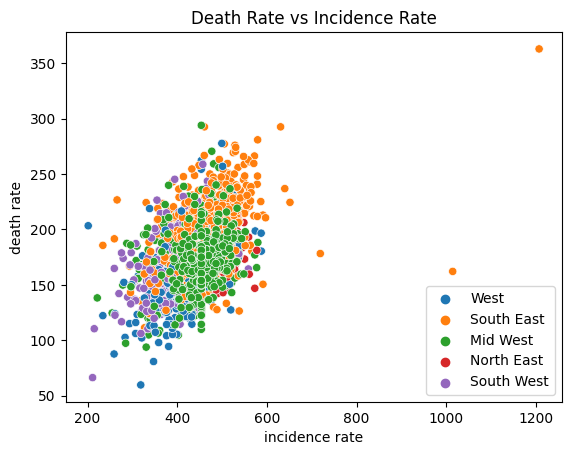

In [70]:
sns.scatterplot(x='incidence rate', y='death rate', hue='region', data=df)
plt.title('Death Rate vs Incidence Rate')
plt.legend();

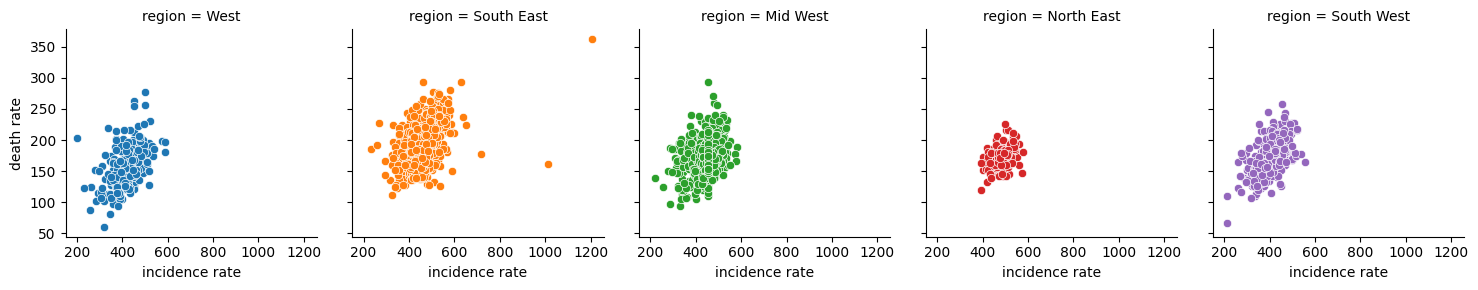

In [71]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region')
facetGrid.map(sns.scatterplot, 'incidence rate', 'death rate');

The scatterplots abov show what seems to be a strong positive relationship between death rate and incidence rate. This is what we would expect as when there is a higher cancer incidence rate or a higher number of people who get cancer, we would expect there to be more deaths from cancer as well. We can also see from this scatter plot that there are slight differences between the regions. We can see that the South East tends to have both the highest incidence rates and death rates and also has some outliers where there are much higher incidence rates relative to death rates. We also note that the West and South West regions seem to have both the lowest incidence and death rates.

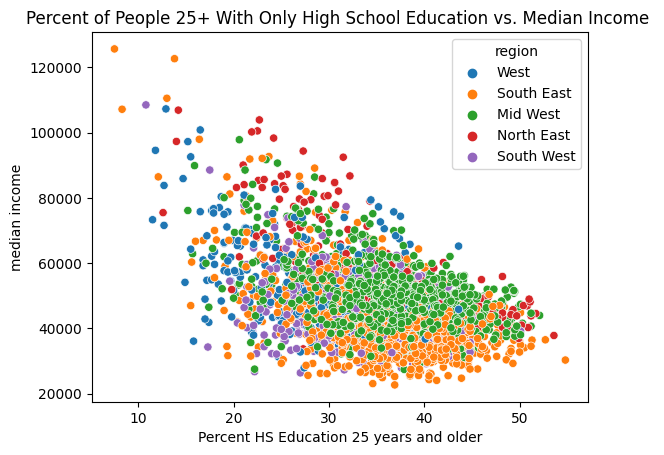

In [72]:
sns.scatterplot(x='pcths25_over', y='median income', hue='region', data=data_cancer)
plt.title("Percent of People 25+ With Only High School Education vs. Median Income ");
plt.xlabel("Percent HS Education 25 years and older");

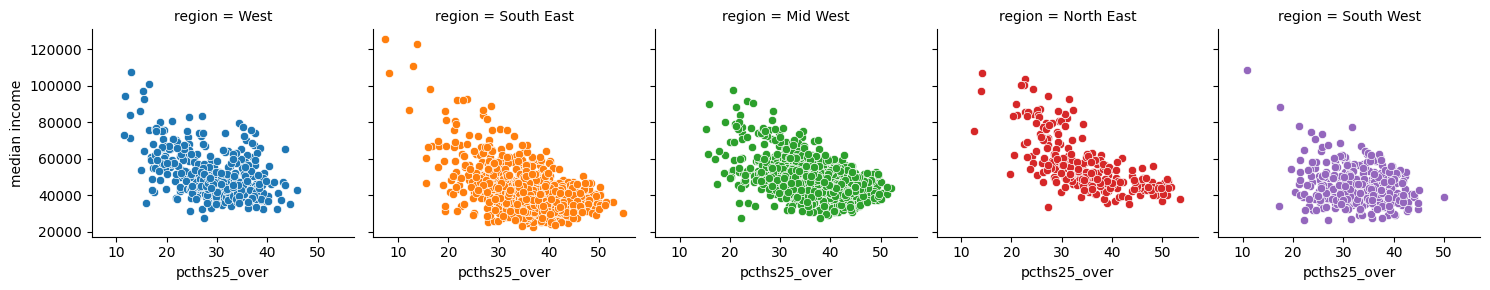

In [73]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region')
facetGrid.map(sns.scatterplot, 'pcths25_over', 'median income');

These scatterplots above show what looks to be a negative correlation between the percent of people age 25 and over with only high school education and median income. This is what we would expect to see from a graph like this as usually a higher level of education is seen to lead to a higher level of income in many fields. There seems to be a weaker relationship in the South West region compared to the other regions.

Now, we will look at health coverage and death rate. Below are two scatterplots, one with the percentage of people with *private* coverage vs the cancer death rate, and the other with the percentage of people with *public* coverage vs the cancer death rate. Note that one could have both private and public coverage, or neither of them, so they are not mutually exclusive. 

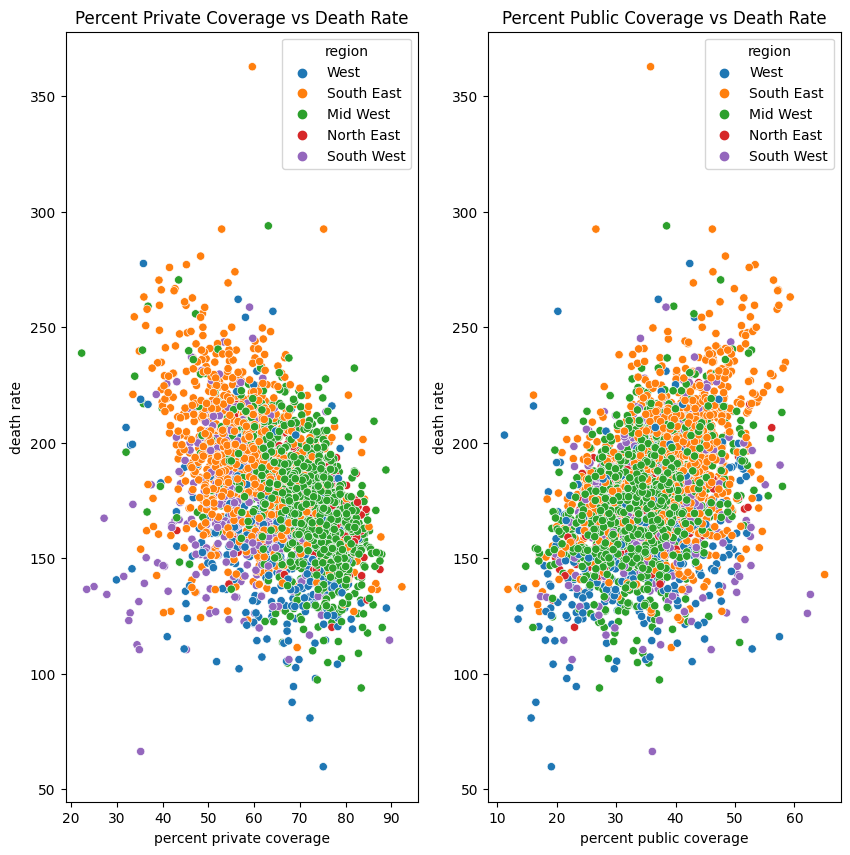

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.scatterplot(x='percent private coverage', y='death rate', hue='region', data=data_cancer, ax=ax1);
sns.scatterplot(x='percent public coverage', y='death rate', hue='region', data=data_cancer, ax=ax2);
ax1.set_title("Percent Private Coverage vs Death Rate"); # Completed with help of CoPilot
ax2.set_title("Percent Public Coverage vs Death Rate"); # Completed with help of CoPilot

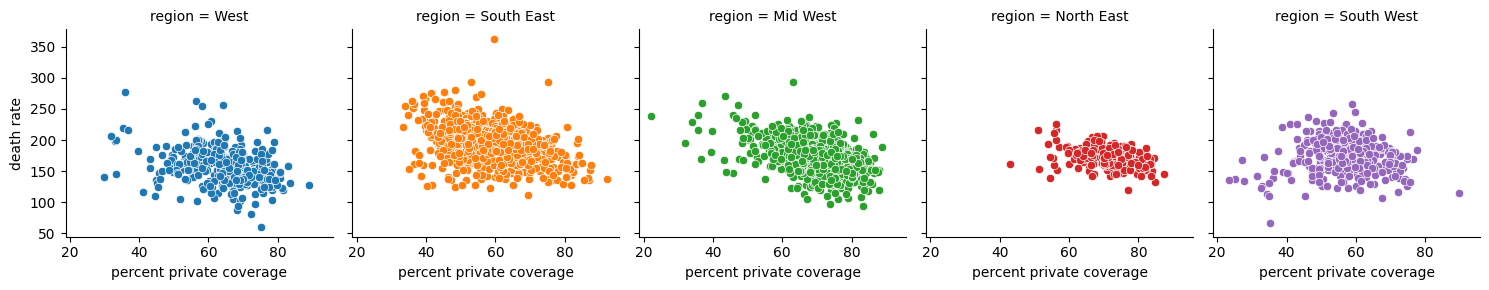

In [75]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region')
facetGrid.map(sns.scatterplot, 'percent private coverage', 'death rate');

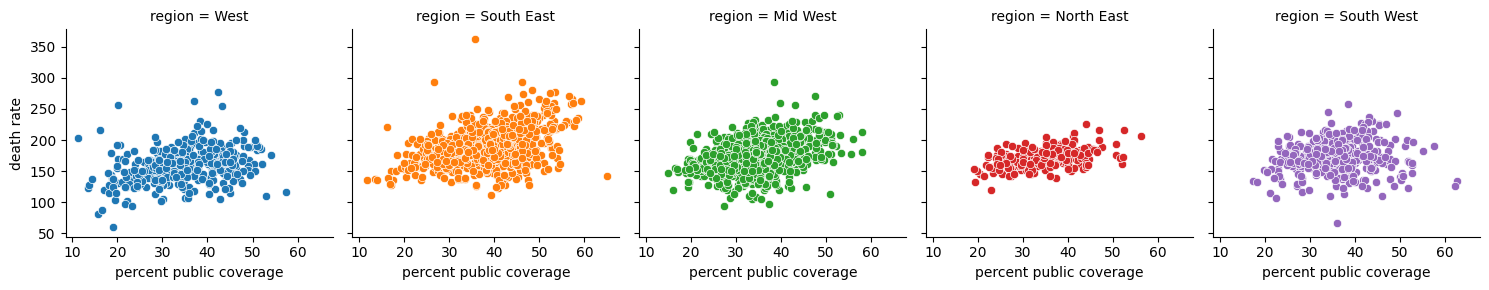

In [76]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region')
facetGrid.map(sns.scatterplot, 'percent public coverage', 'death rate');

The scatterplots of percent private coverage vs death rate suggest that there is some negative relationship between percent private coverage and death rate exists. In the South West region, however, this relationship does not seem to be as prominent compared to the other regions.

The scatterplots of percent public coverage vs death rate suggest that there is some positive relationship between percent public coverage and death rate with what seems to be a weaker relationship for the South West region. This general trend makes sense, as while they are not mutually exclusive, we can see from the scatterplot below that private and public health coverage seem to have a strong negative relationship. Intuitively, this could mean that counties with a higher population with public coverage will likely have a lower population with private coverage, and likely a higher cancer death rate.

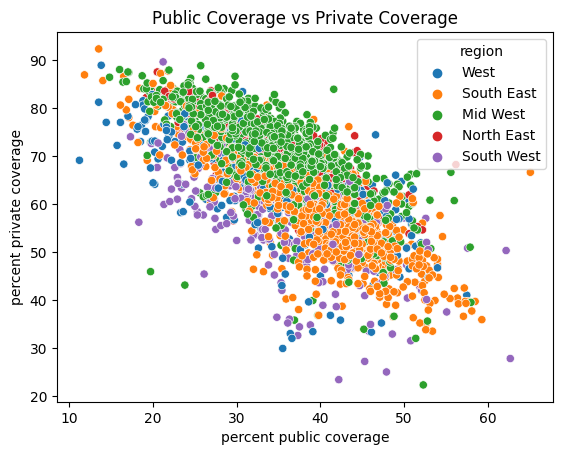

In [77]:
sns.scatterplot(x='percent public coverage', y='percent private coverage', hue='region', data=data_cancer)
plt.title("Public Coverage vs Private Coverage");

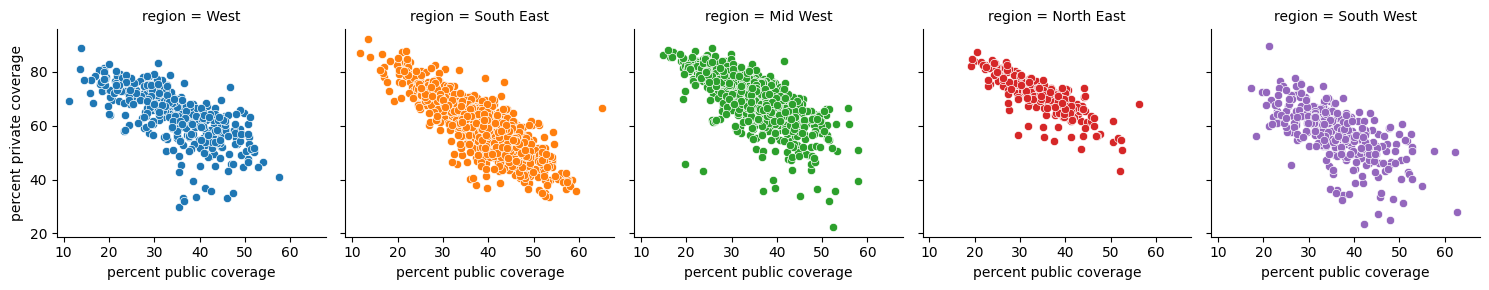

In [78]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region')
facetGrid.map(sns.scatterplot, 'percent public coverage', 'percent private coverage');

The scatterplots above show what seems to be a strong negative correlation between the percent of people with public coverage and the percent of people with private coverage. We can also see a difference in the distibutions for different regions. For example, the South East region tends to have a higher percent with public coverage while also having a lower percent with private coverage. The North East and Mid West regions seem to have a higher percent with private coverage and a lower percent with public coverage compared to the South East region. However, all regions follow this overall negative relationship. This is what we would expect as with more people with one type of coverage tends to lead to less people with other types of coverage since most people have exactly one type of health coverage.

A strong negative relationship between private coverage and cancer death rates would bode well for our hypothesis. This is because we can expect populations with a higher socioeconomic status would have better access to private health coverage, and we expect private health coverage to be more effective than public coverage. From the scatterplots below, we see that this is true, as there seems to be a strong positive relationship between median income and private health coverage, as well as a strong negative relationship between median income and public health coverage.

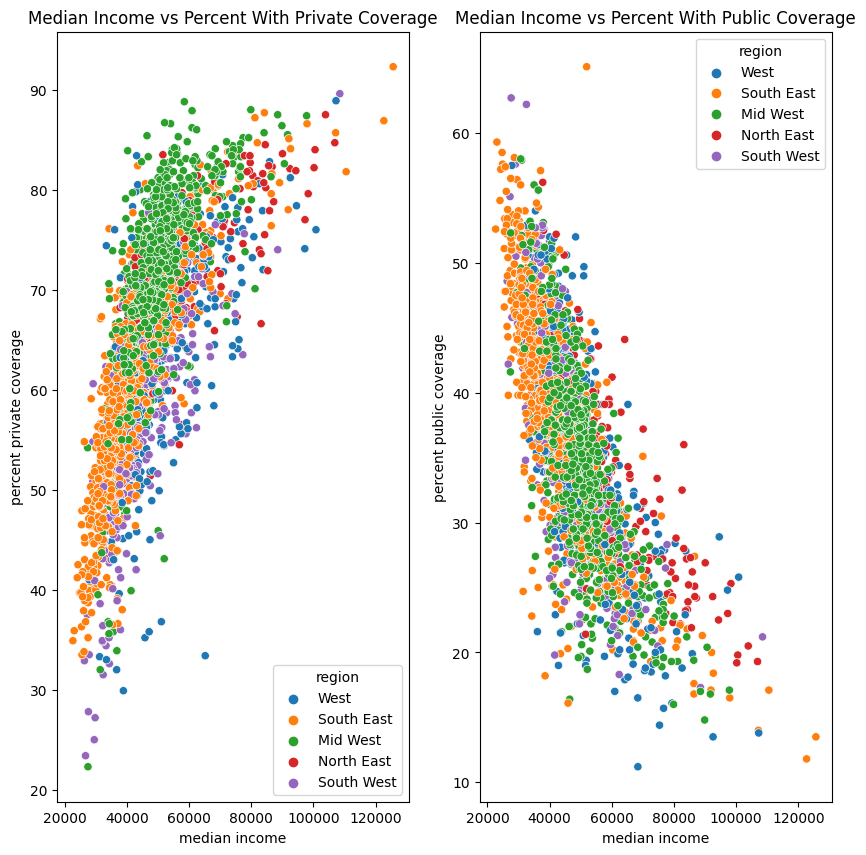

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
sns.scatterplot(x='median income', y='percent private coverage', hue='region', data=data_cancer, ax=ax1)
sns.scatterplot(x='median income', y='percent public coverage', hue='region', data=data_cancer, ax=ax2)
ax1.set_title("Median Income vs Percent With Private Coverage"); # Completed with help of CoPilot
ax2.set_title("Median Income vs Percent With Public Coverage"); # Completed with help of CoPilot

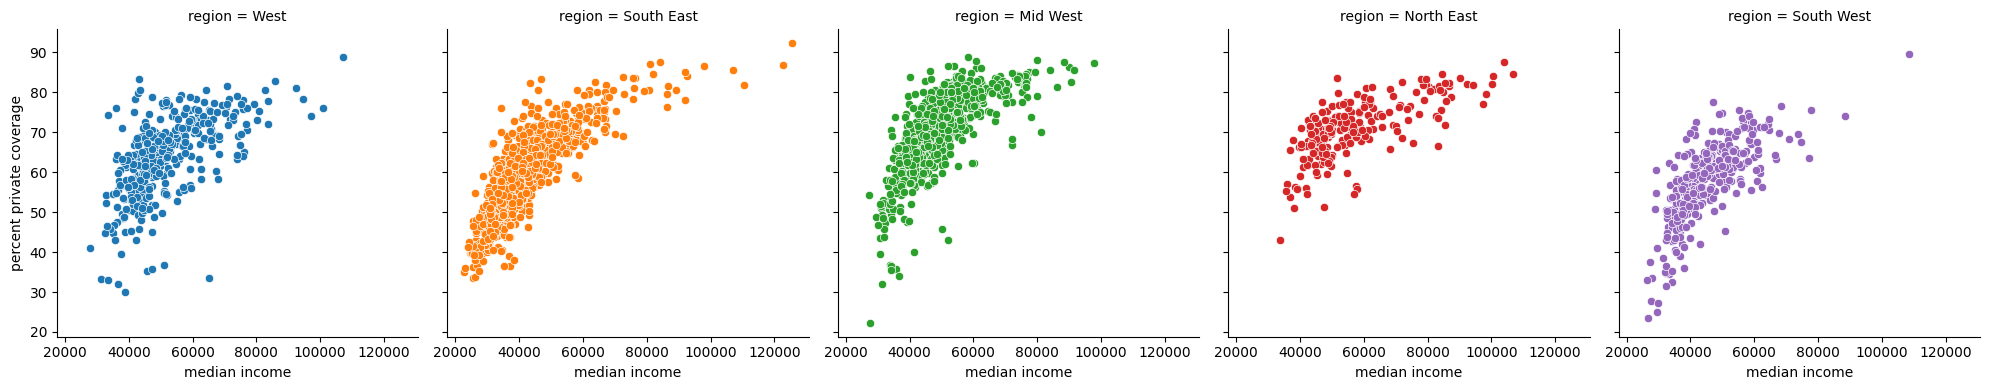

In [80]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region', height=4)
facetGrid.map(sns.scatterplot, 'median income', 'percent private coverage');

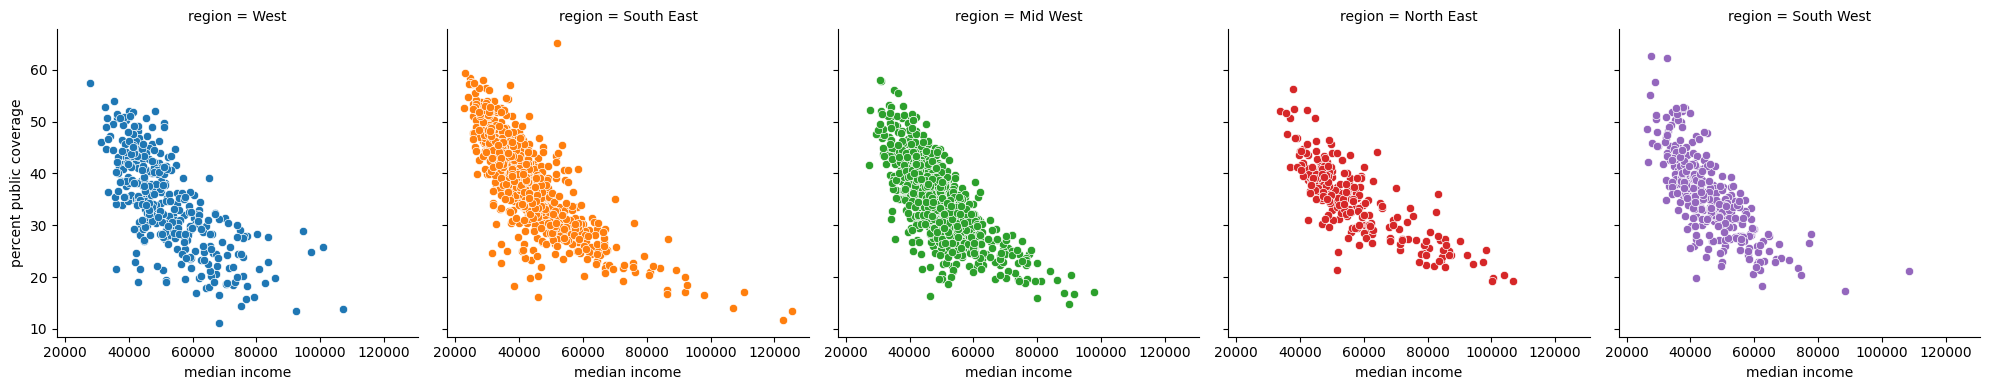

In [81]:
facetGrid = sns.FacetGrid(col='region', data=data_cancer, hue='region', height=4)
facetGrid.map(sns.scatterplot, 'median income', 'percent public coverage');

The scatter plots of median income vs percent private coverage seem to show a strong positive relationship between median income and percent of people with private coverage. The scatter plot of median income vs percent public coverage shows the opposite, with a strong negative relationship between median income and percent of people with public coverage.

This is what we would expect since in the United States, private health coverage tends to cost more than public health coverage. Because of this difference in costs, we would expect people with lower incomes to opt for the less costly option of public health coverage and people with higher incomes to opt for the more costly option of private health coverage. 